In [ ]:
# Motor Insurance Customer Profiling and Risk Segmentation

This project analyzes customer behavior in a motor insurance dataset using exploratory data analysis and clustering.
The goal is to extract insights that help the insurance company improve pricing strategies, retention,
and acquisition efforts.

In [23]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")



In [3]:
#Load and Explore the Data
import pandas as pd
df=pd.read_csv("Insurance_Vintage_Data.csv")
# Preview dataset
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11,1,< 1 Year,No,35786,152,53
1,381111,Male,40,1,28,0,1-2 Year,Yes,33762,7,111
2,381112,Male,47,1,28,0,1-2 Year,Yes,40050,124,199
3,381113,Male,24,1,27,1,< 1 Year,Yes,37356,152,187
4,381114,Male,27,1,28,1,< 1 Year,No,59097,152,297


In [4]:
#Load and Explore the Data
import pandas as pd
df=pd.read_csv("Insurance_Vintage_Data.csv")

# Check structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    127037 non-null  int64 
 1   Gender                127037 non-null  object
 2   Age                   127037 non-null  int64 
 3   Driving_License       127037 non-null  int64 
 4   Region_Code           127037 non-null  int64 
 5   Previously_Insured    127037 non-null  int64 
 6   Vehicle_Age           127037 non-null  object
 7   Vehicle_Damage        127037 non-null  object
 8   Annual_Premium        127037 non-null  int64 
 9   Policy_Sales_Channel  127037 non-null  int64 
 10  Vintage               127037 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 10.7+ MB


In [12]:
#Data Cleaning & Preprocessing
# Convert categorical variables
df=pd.read_csv("Insurance_Vintage_Data.csv")
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["Vehicle_Damage"] = label_encoder.fit_transform(df["Vehicle_Damage"])
vehicle_age_mapping = {"< 1 Year": 0, "1-2 Year": 1, "> 2 Years": 2}
df["Vehicle_Age"] = df["Vehicle_Age"].map(vehicle_age_mapping)

# Drop unneeded columns 
df_clean = df.drop(columns=["id", "Region_Code"])
# confirming variables have been converted
df.head()



,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11,1,0,0,35786,152,53
1,381111,1,40,1,28,0,1,1,33762,7,111
2,381112,1,47,1,28,0,1,1,40050,124,199
3,381113,1,24,1,27,1,0,1,37356,152,187
4,381114,1,27,1,28,1,0,0,59097,152,297


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
df=pd.read_csv("Insurance_Vintage_Data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11,1,< 1 Year,No,35786,152,53
1,381111,Male,40,1,28,0,1-2 Year,Yes,33762,7,111
2,381112,Male,47,1,28,0,1-2 Year,Yes,40050,124,199
3,381113,Male,24,1,27,1,< 1 Year,Yes,37356,152,187
4,381114,Male,27,1,28,1,< 1 Year,No,59097,152,297


In [12]:
df=pd.read_csv("Insurance_Vintage_Data.csv")
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    127037 non-null  int64 
 1   Gender                127037 non-null  object
 2   Age                   127037 non-null  int64 
 3   Driving_License       127037 non-null  int64 
 4   Region_Code           127037 non-null  int64 
 5   Previously_Insured    127037 non-null  int64 
 6   Vehicle_Age           127037 non-null  object
 7   Vehicle_Damage        127037 non-null  object
 8   Annual_Premium        127037 non-null  int64 
 9   Policy_Sales_Channel  127037 non-null  int64 
 10  Vintage               127037 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 10.7+ MB


In [3]:
# converting Gender and Vehicle_Damage to Categorical Variables
import pandas as pd
df=pd.read_csv("Insurance_Vintage_Data.csv")
label_encoder=LabelEncoder()
df["Gender"]=label_encoder.fit_transform(df["Gender"])
df["Vehicle_Damage"]=label_encoder.fit_transform(df["Vehicle_Damage"])



In [4]:
# Convert Vehicle_Age to Numerical Variable
Vehicle_age_mapping={"< 1 Year":0,"1-2 Year":1,"> 2 Years": 3}
df["Vehicle_Age"]=df["Vehicle_Age"].map(Vehicle_age_mapping)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    127037 non-null  int64 
 1   Gender                127037 non-null  object
 2   Age                   127037 non-null  int64 
 3   Driving_License       127037 non-null  int64 
 4   Region_Code           127037 non-null  int64 
 5   Previously_Insured    127037 non-null  int64 
 6   Vehicle_Age           127037 non-null  int64 
 7   Vehicle_Damage        127037 non-null  object
 8   Annual_Premium        127037 non-null  int64 
 9   Policy_Sales_Channel  127037 non-null  int64 
 10  Vintage               127037 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 10.7+ MB


In [13]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11,1,0,0,35786,152,53
1,381111,1,40,1,28,0,1,1,33762,7,111
2,381112,1,47,1,28,0,1,1,40050,124,199
3,381113,1,24,1,27,1,0,1,37356,152,187
4,381114,1,27,1,28,1,0,0,59097,152,297


Vehicle_Damage
0    30354.891839
1    30692.712023
Name: Annual_Premium, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_30936\1596816062.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


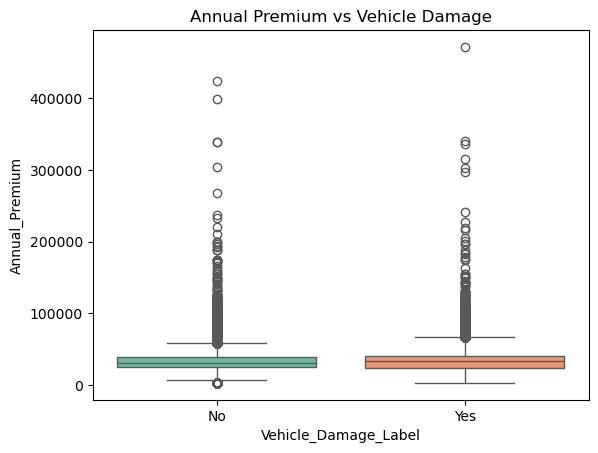

In [22]:
#Exploratory Data Analysis (EDA)
# Mean annual premium by damage status
mean_premiums = df.groupby("Vehicle_Damage")["Annual_Premium"].mean()
print(mean_premiums)

# Boxplot: Annual Premium vs Vehicle Damage
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(
    data=df.assign(Vehicle_Damage_Label=df["Vehicle_Damage"].map({0: "No", 1: "Yes"})),
    x="Vehicle_Damage_Label",
    y="Annual_Premium",
    palette="Set2"
)

plt.title("Annual Premium vs Vehicle Damage")
plt.show()



In [25]:
#Exploratory Data Analysis (EDA)
# Computing Correlation
selected_cols = ["Vehicle_Age", "Vehicle_Damage", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]
corr = df[selected_cols].corr()
print(corr)


                      Vehicle_Age  Vehicle_Damage  Annual_Premium  \
Vehicle_Age              1.000000        0.399934        0.041549   
Vehicle_Damage           0.399934        1.000000        0.009968   
Annual_Premium           0.041549        0.009968        1.000000   
Policy_Sales_Channel    -0.548640       -0.230298       -0.116452   
Vintage                  0.002023        0.001879       -0.001607   

                      Policy_Sales_Channel   Vintage  
Vehicle_Age                      -0.548640  0.002023  
Vehicle_Damage                   -0.230298  0.001879  
Annual_Premium                   -0.116452 -0.001607  
Policy_Sales_Channel              1.000000 -0.003257  
Vintage                          -0.003257  1.000000  


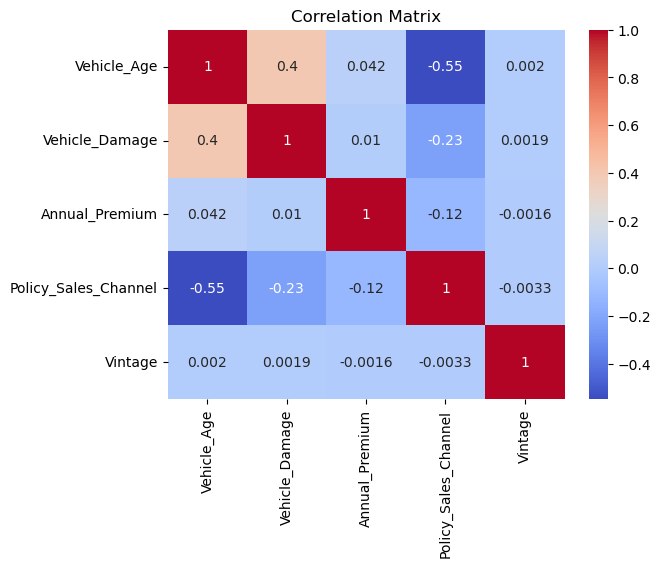

In [24]:
#  Plot Correlation matrix
corr = df[["Vehicle_Age", "Vehicle_Damage", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [28]:
#Clustering Analysis

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# Drop ID and Region_Code 
df = df.drop(columns=["id", "Region_Code"])


# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# View summary
print(df.groupby("Cluster").mean(numeric_only=True))



           Gender        Age  Driving_License  Previously_Insured  \
Cluster                                                             
0        0.444387  27.821050         0.999959            0.926488   
1        0.633292  54.420917         0.994300            0.311164   
2        0.551586  35.704332         1.000000            0.016963   

         Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
Cluster                                                                      
0           0.171473        0.027951    29944.862060            146.974377   
1           1.104077        0.647675    34687.048146             46.291955   
2           0.630522        0.960196    26674.104488            138.456680   

            Vintage  
Cluster              
0        153.961421  
1        154.782241  
2        154.269955  


Cluster
0    48550
1    41229
2    37258
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_30936\3432156387.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Annual_Premium", data=df, palette="coolwarm")


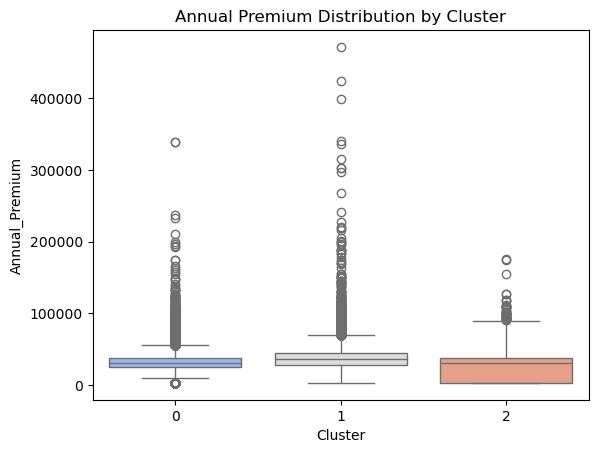

C:\Users\Admin\AppData\Local\Temp\ipykernel_30936\3432156387.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Age", data=df, estimator='mean', palette="Set2")


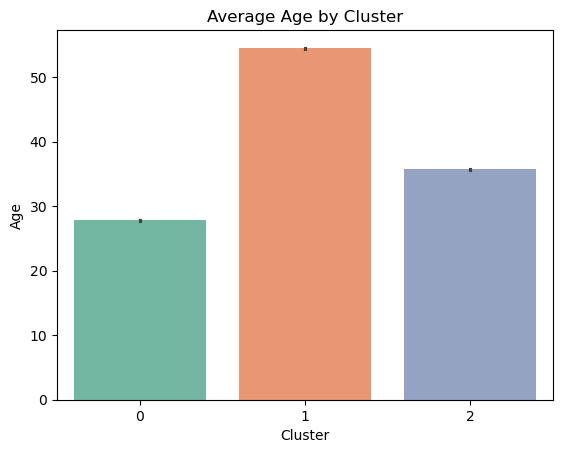

In [32]:
#Clustering Insights and Visualization
# Distribution of clusters
print(df['Cluster'].value_counts())

# Boxplot by cluster
sns.boxplot(x="Cluster", y="Annual_Premium", data=df, palette="coolwarm")
plt.title("Annual Premium Distribution by Cluster")
plt.show()

# Bar plot: Average age per cluster
sns.barplot(x="Cluster", y="Age", data=df, estimator='mean', palette="Set2")
plt.title("Average Age by Cluster")
plt.show()

In [ ]:
## Key Business Insights


Cluster 0: Young, low-premium customers, mostly insured.
– Consider entry-level offerings with simple onboarding to attract and retain this group.

Cluster 1: Older customers with higher premiums and a history of vehicle damage.
– Upsell complementary products and offer loyalty discounts to encourage broader insurance adoption.

Cluster 2: Small niche cluster; low insurance coverage but high risk.
– Evaluate pricing strategies and implement targeted education or risk-mitigation initiatives.

##Recommendations
Introduce loyalty programs for long-standing, low-risk customers to enhance retention.

Adjust pricing models to better reflect risk factors such as damage history and vehicle age.

Launch acquisition campaigns targeting uninsured populations through mobile-first digital platforms.


